In [ ]:
https://colab.research.google.com/drive/1NFEqk1wZPvuaiXJ_IsvjzJAEoaYqvIXG

Actividad:

1.- Tomar dataset y entrada del notebook anterior

2.- Aplicar un modelo convolucional de 2 capas convolucionales a la entrada

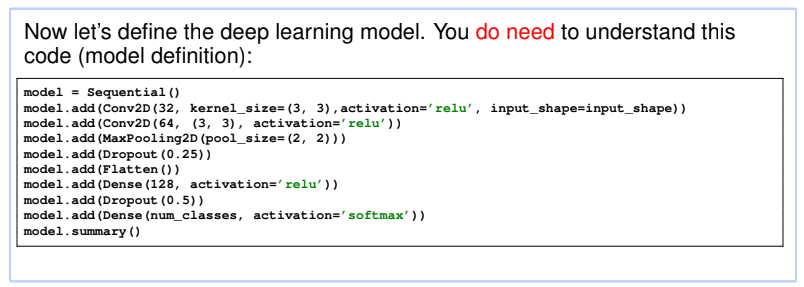

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout

model = Sequential()
model.add(Dense(100, input_dim = 100, activation="relu"))

# capa de entrada (x) : dim 100
# capa oculta (h) : dim 100
# 100 * 100  + bias(100) = 10100

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
Total params: 10,100
Trainable params: 10,100
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.datasets import cifar10

((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
#trainX = trainX.reshape((trainX.shape[0], 3072))
#testX = testX.reshape((testX.shape[0], 3072))


170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
from keras.utils import to_categorical

testY = to_categorical(testY)
trainY = to_categorical(trainY)

In [ ]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout


input_shape = trainX[0].shape # (32,32,3) 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2) ))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="Softmax"))

#model.add(Dense(1024, input_shape=(3072,), activation="relu"))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(10, activation="softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               1605760   
                                                      

In [ ]:
from keras.optimizers import SGD

sgd = SGD(0.01)

model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [ ]:
algo = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32) 

Epoch 1/100
1563/1563 [==============================] - 18s 6ms/step - loss: 1.9054 - accuracy: 0.3123 - val_loss: 2.0160 - val_accuracy: 0.2918
Epoch 2/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5666 - accuracy: 0.4385 - val_loss: 1.4057 - val_accuracy: 0.4970
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4261 - accuracy: 0.4903 - val_loss: 1.3348 - val_accuracy: 0.5263
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3077 - accuracy: 0.5348 - val_loss: 1.2404 - val_accuracy: 0.5638
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2116 - accuracy: 0.5688 - val_loss: 1.1555 - val_accuracy: 0.5922
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1330 - accuracy: 0.5991 - val_loss: 1.0825 - val_accuracy: 0.6198
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0640 - accuracy: 0.6214 - val_loss: 1.0440 - val_a

In [ ]:
!nvidia-smi

Wed Mar 29 18:03:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |   1885MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
algo.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f48a924b580>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [1.9053740501403809,
   1.5665745735168457,
   1.4261293411254883,
   1.3077093362808228,
   1.211642861366272,
   1.1329693794250488,
   1.0640168190002441,
   1.00635826587677,
   0.955322802066803,
   0.9055399894714355,
   0.8641058802604675,
   0.822058379650116,
   0.7798788547515869,
   0.7444611191749573,
   0.7146433591842651,
   0.6769428253173828,
   0.6422149538993835,
   0.6131705641746521,
   0.5871586203575134,
   0.5563721656799316,
   0.5277557969093323,
   0.5046353936195374,
   0.47426968812942505,
   0.4552640914916992,
   0.4309353828430176,
   0.4090220630168915,
   0.39144450426101685,
   0.37267830967903137,
   0.3493286967277527,
   0.33287352323532104,
   0.32100504636764526,
   0.31202635169029236,
   0.29062479734420776,
   0.28265753388404846,
   0.2660536468029022,
   0.25642189383506775,